<a href="https://colab.research.google.com/github/sarthakshukla74/WINE_QUALITY_PREDICTION/blob/main/WINE_QUALITY_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv('WineQT.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


**EDA**

**HEATMAP FOR CHECKING CORRELATION**

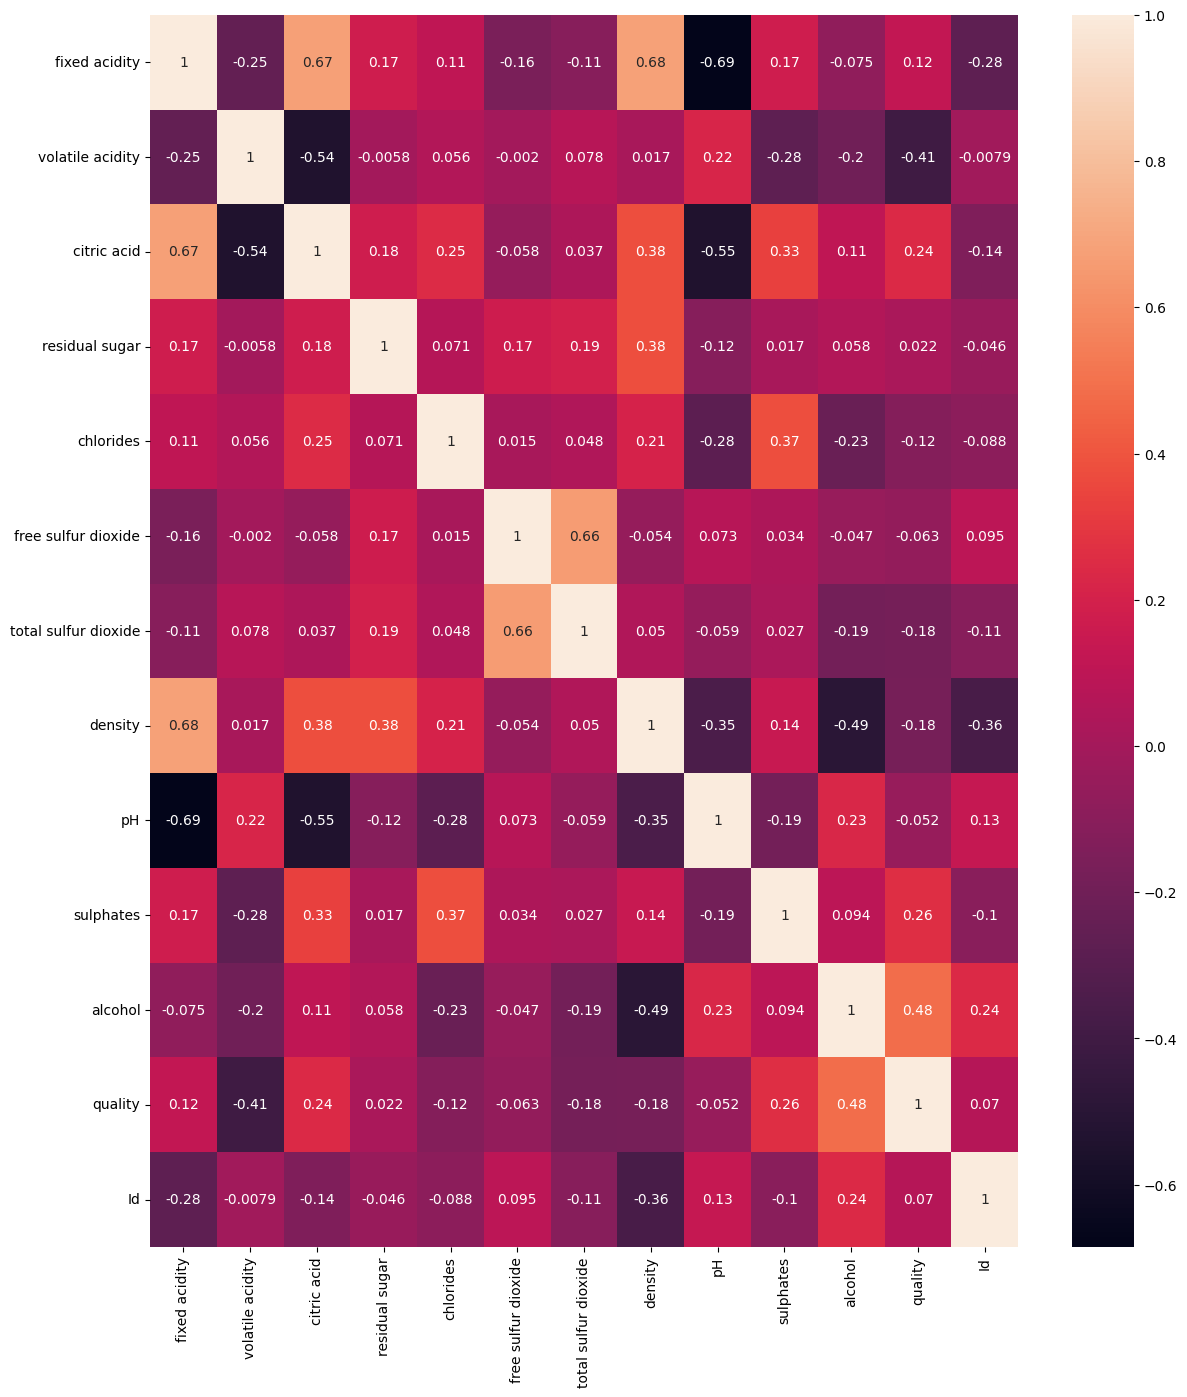

In [ ]:
plt.figure(figsize=(14,16))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

**CHECKING OUTLIERS**

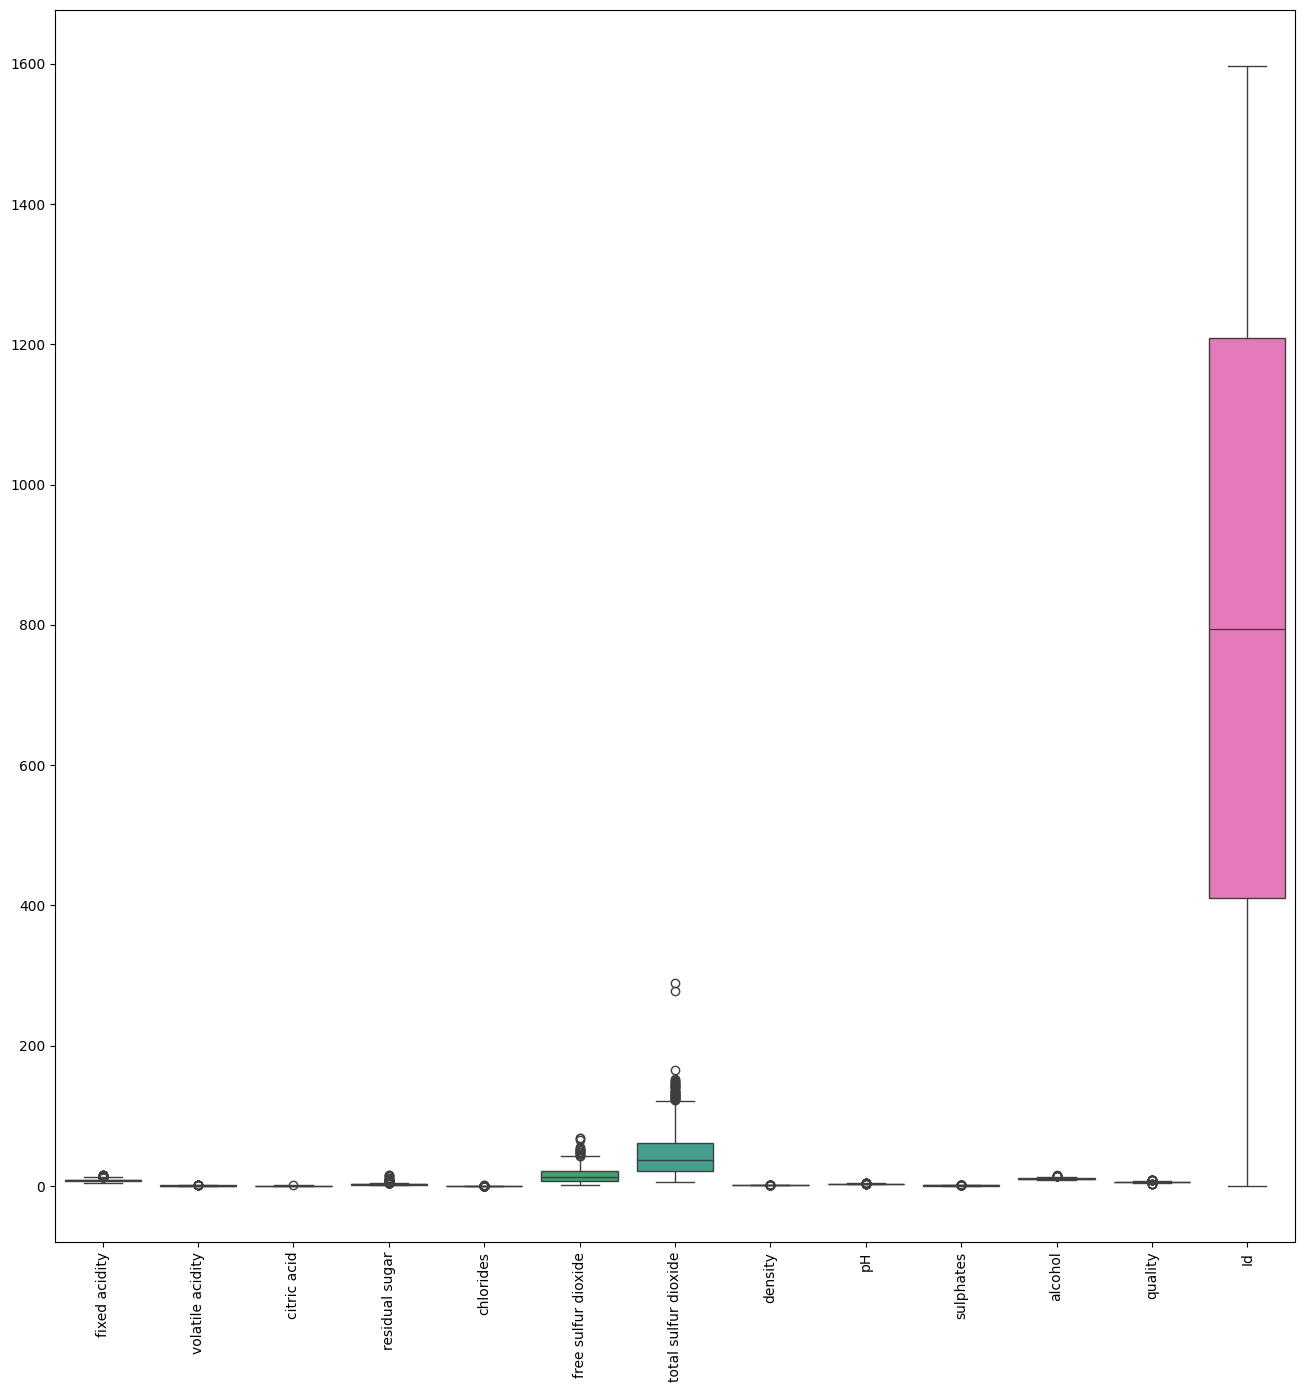

In [ ]:
plt.figure(figsize=(16,16))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

**CHECKING DISTRIBUTION**

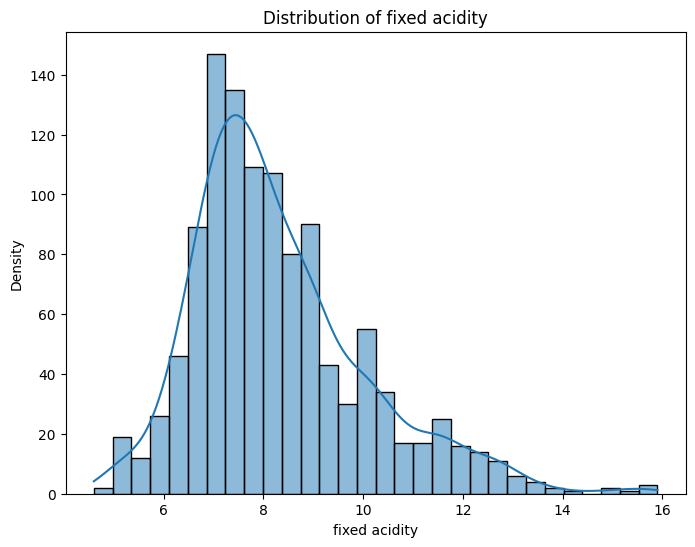

1.0449299563724053


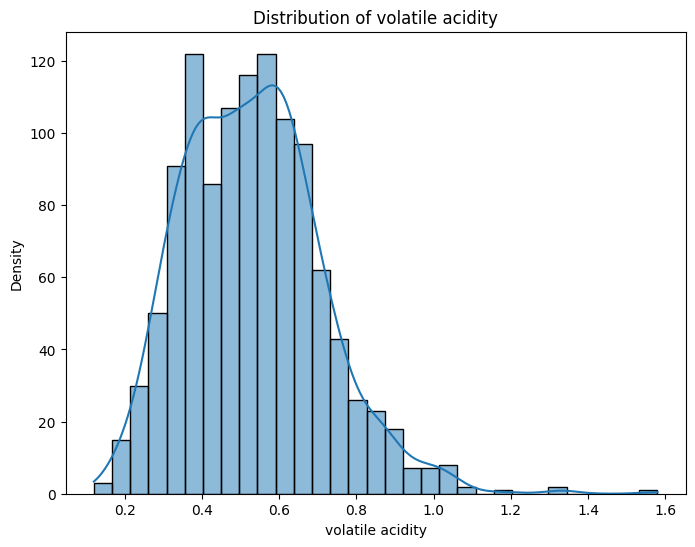

0.6815474143781255


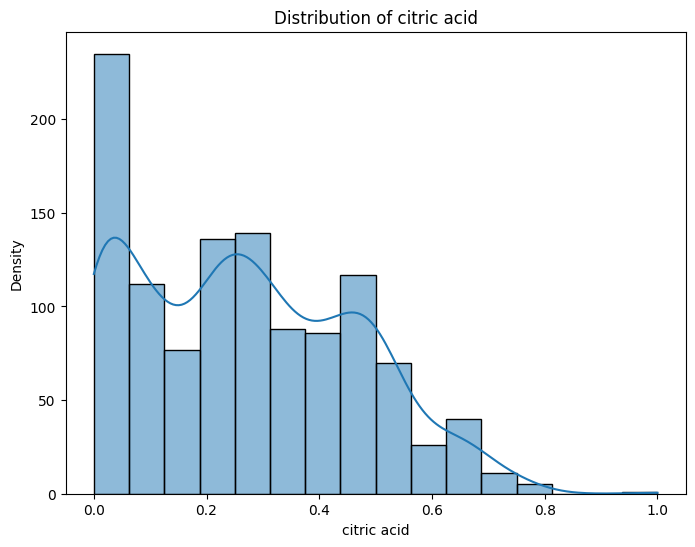

0.3715607833706083


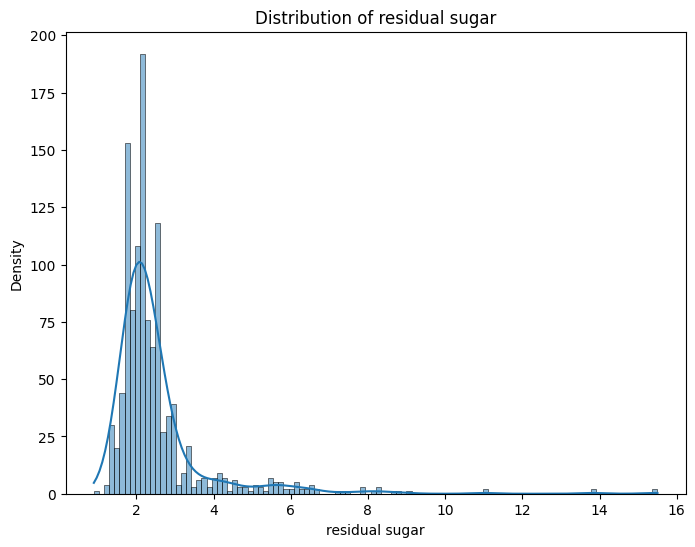

4.361096404323471


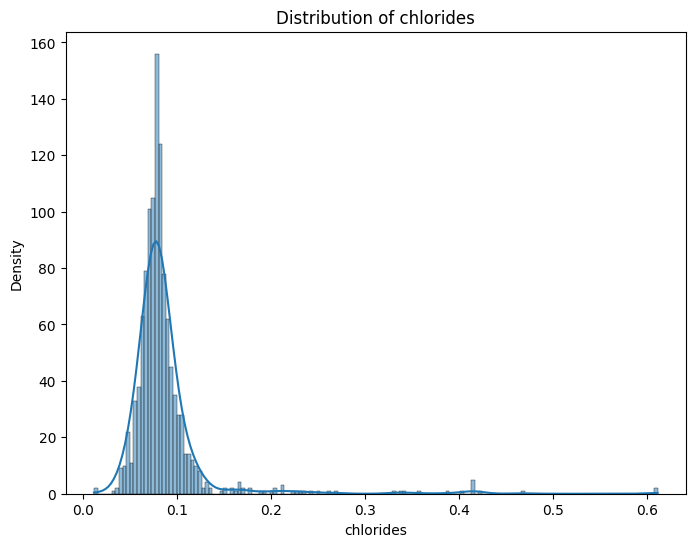

6.026360154399587


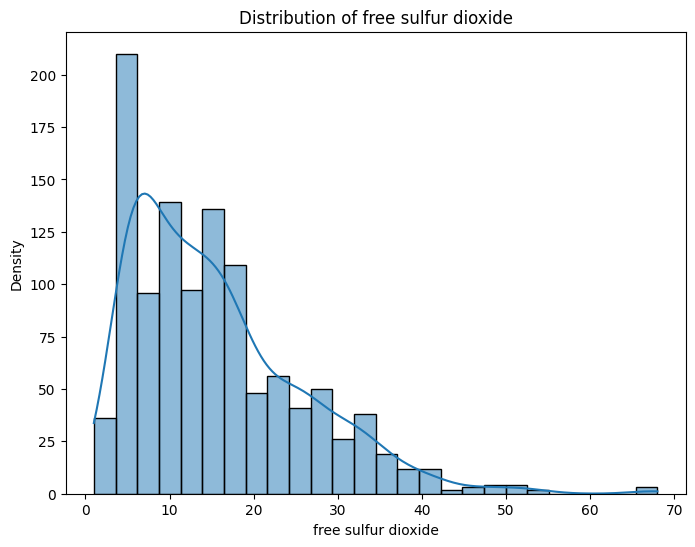

1.2312611567075427


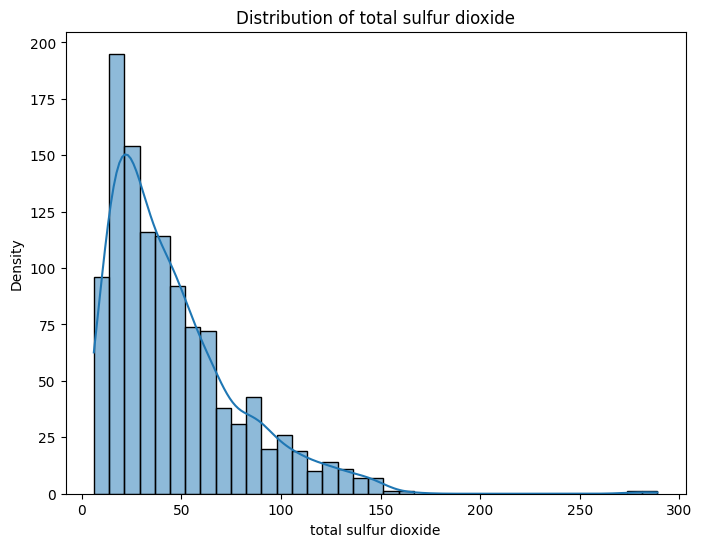

1.6657660141342994


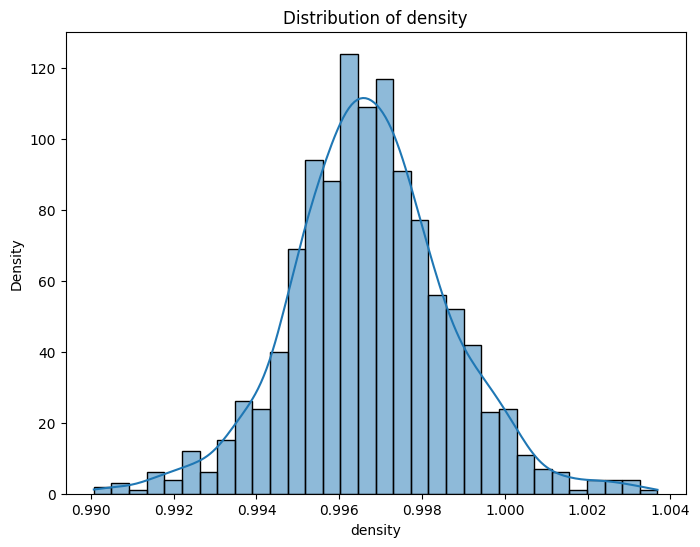

0.102395108720599


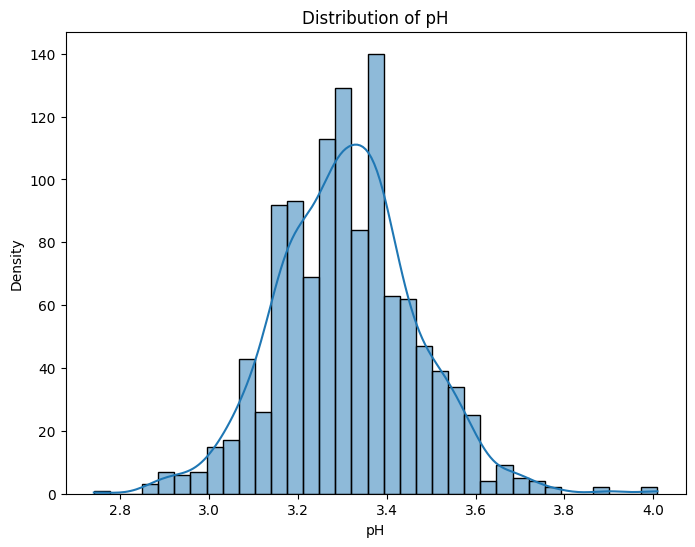

0.22113839209685748


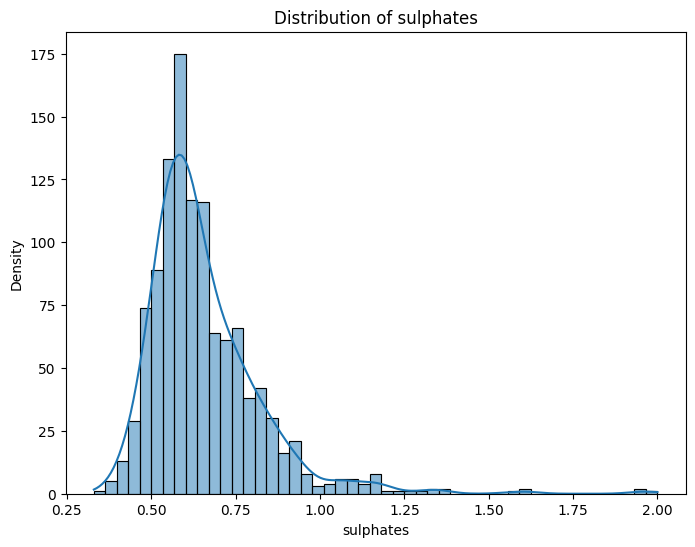

2.497266051332364


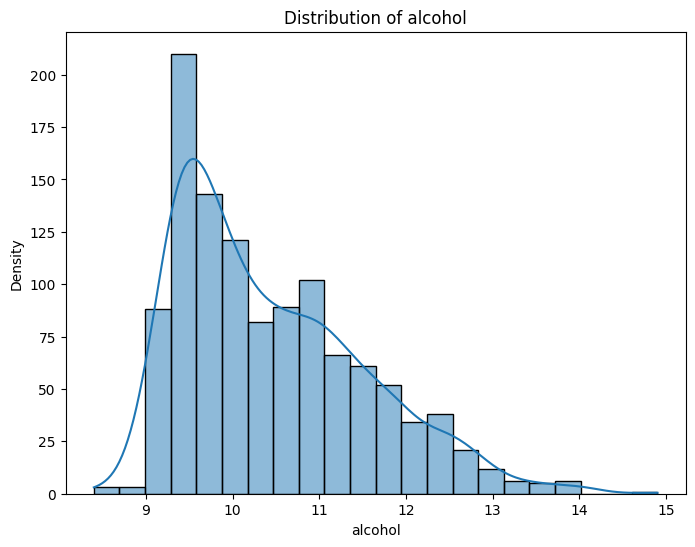

0.8633132317223615


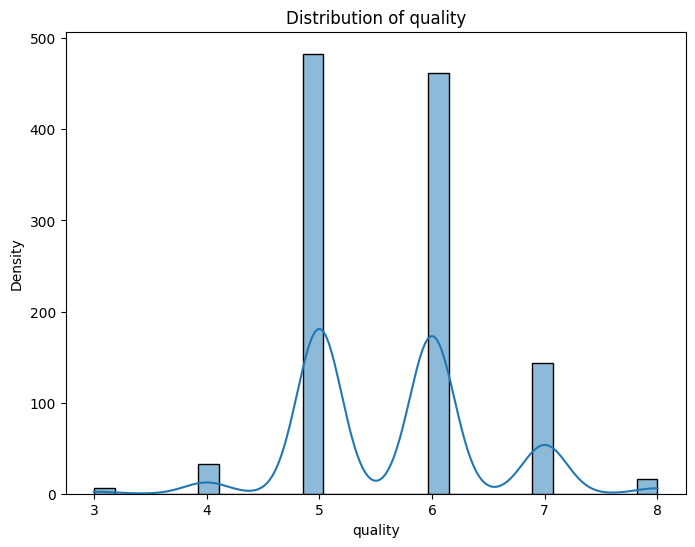

0.2867917004538591


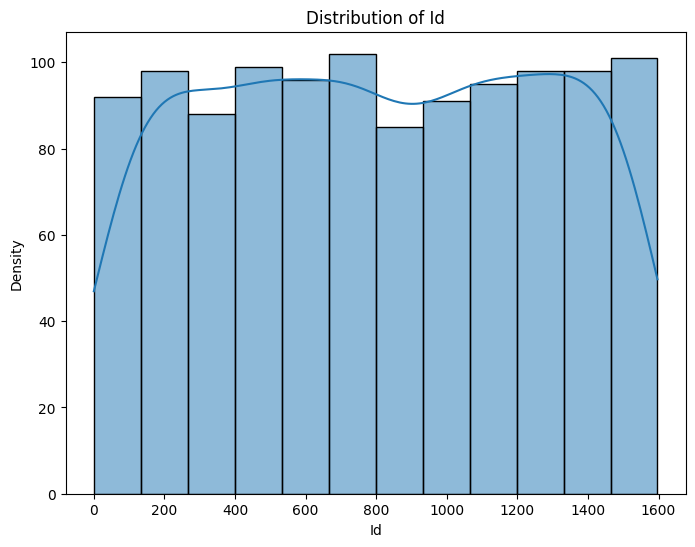

-0.010419214399482268


In [ ]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()
    print(df[column].skew())

**OUTLIER HANDLING**


*   *USING Z SCORE IF DATA IS NORMAL*
*   *USING IQR METHOD IF DATA IS SKEWED*



In [ ]:
def outlier_handling(df,column):
 for col in column:
  if(abs(df[col].skew())<=0.3):
    mean=df[col].mean()
    std=df[col].std()
    feature=col+'_zscore'
    df[feature]=(df[col]-mean)/std
    ub=mean+3*std
    lb=mean-3*std
    df[col]=np.where(df[feature]>3,ub,df[col])
    df[col]=np.where(df[feature]<-3,lb,df[col])
    df.drop(columns=[feature],inplace=True)
  else:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df[col]=np.where(df[col]>upper_bound,upper_bound,df[col])
    df[col]=np.where(df[col]<lower_bound,lower_bound,df[col])


In [ ]:
outlier_handling(df,df.columns)

In [ ]:
df.shape

(1143, 13)

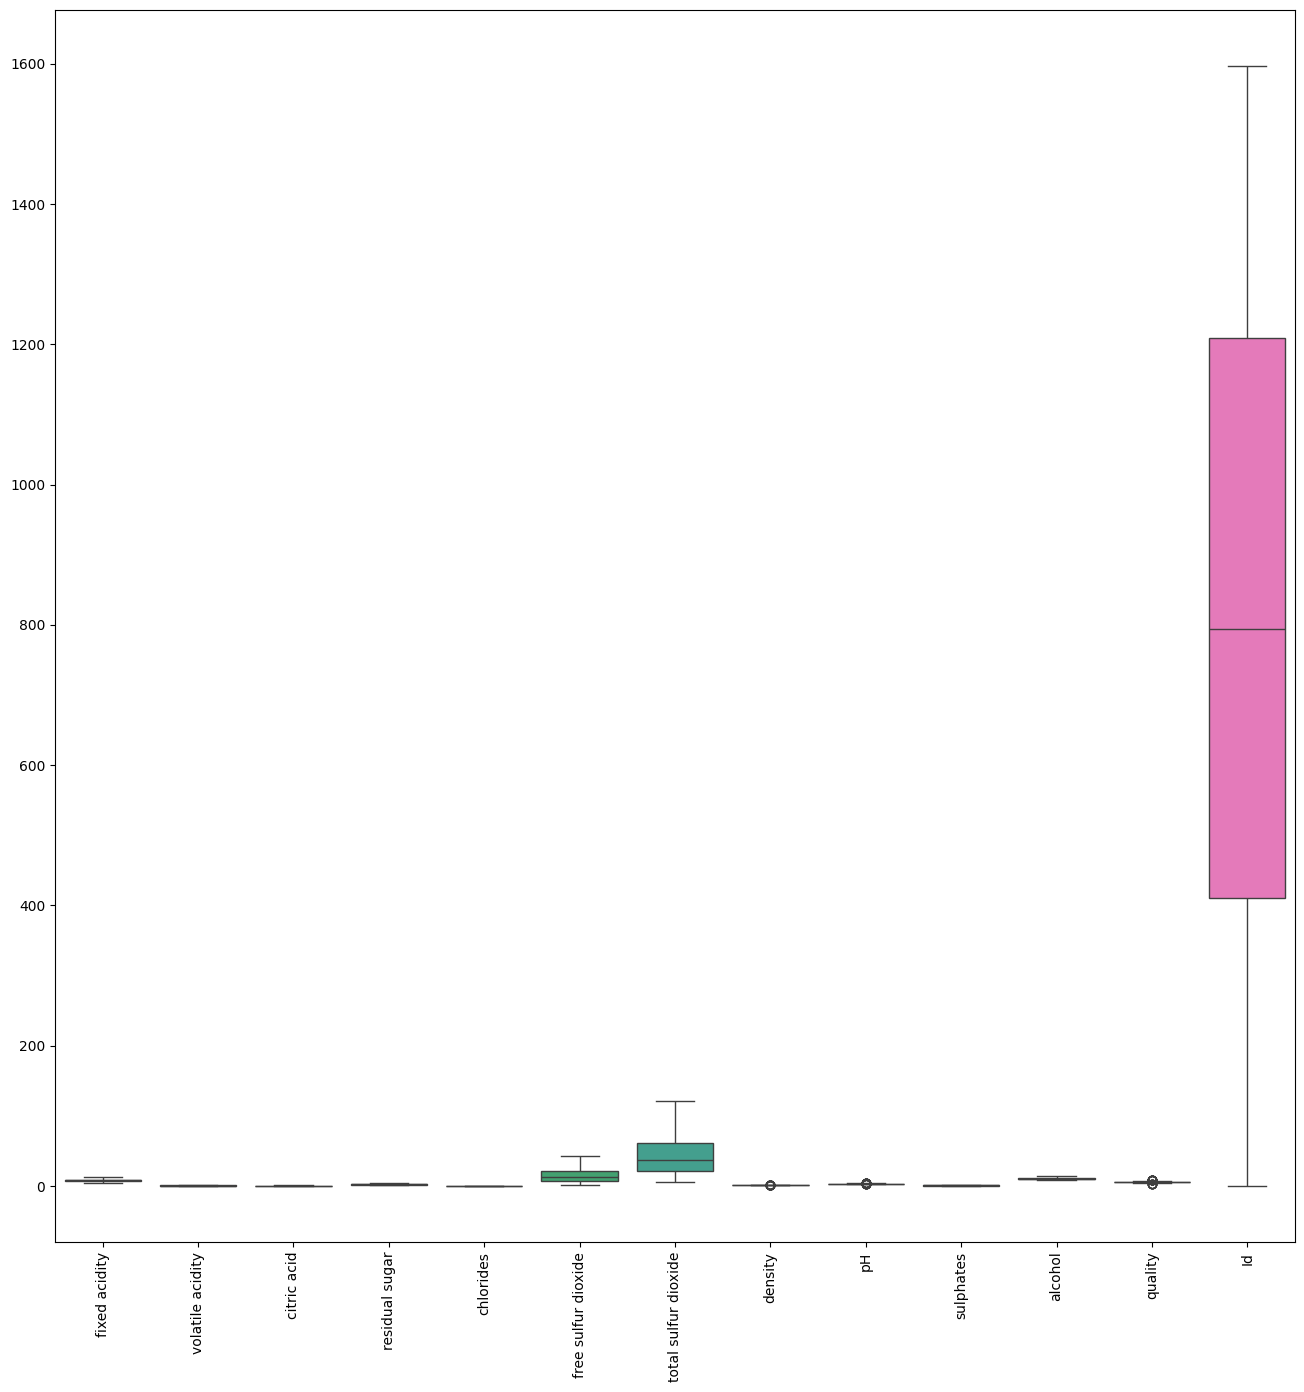

In [ ]:
plt.figure(figsize=(16,16))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
x=df.drop(columns='quality',axis=1)
y=df['quality'].astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,random_state=42
)

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Train shape: (857, 12)
Test shape: (286, 12)
y_train shape: (857,)
y_test shape: (286,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight='balanced')

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

[Text(0.5994120896464646, 0.975, 'x[9] <= 0.645\ngini = 0.833\nsamples = 857\nvalue = [142.833, 142.833, 142.833, 142.833, 142.833, 142.833]'),
 Text(0.4683733643250689, 0.925, 'x[11] <= 1468.0\ngini = 0.776\nsamples = 504\nvalue = [142.833, 120.859, 106.928, 75.815, 30.139, 10.987]'),
 Text(0.5338927269857667, 0.95, 'True  '),
 Text(0.41057592975206614, 0.875, 'x[4] <= 0.12\ngini = 0.783\nsamples = 464\nvalue = [71.417, 115.365, 97.458, 71.207, 28.829, 10.987]'),
 Text(0.33997646923783287, 0.825, 'x[2] <= 0.655\ngini = 0.756\nsamples = 446\nvalue = [23.806, 115.365, 95.485, 66.6, 28.829, 10.987]'),
 Text(0.2391815886134068, 0.775, 'x[1] <= 0.665\ngini = 0.72\nsamples = 438\nvalue = [0.0, 115.365, 94.696, 65.343, 26.208, 10.987]'),
 Text(0.10347796143250688, 0.725, 'x[8] <= 3.0\ngini = 0.745\nsamples = 333\nvalue = [0.0, 38.455, 70.233, 53.615, 24.898, 10.987]'),
 Text(0.03764921946740129, 0.675, 'x[9] <= 0.565\ngini = 0.131\nsamples = 3\nvalue = [0.0, 0.0, 0.395, 0.419, 0.0, 10.987]')

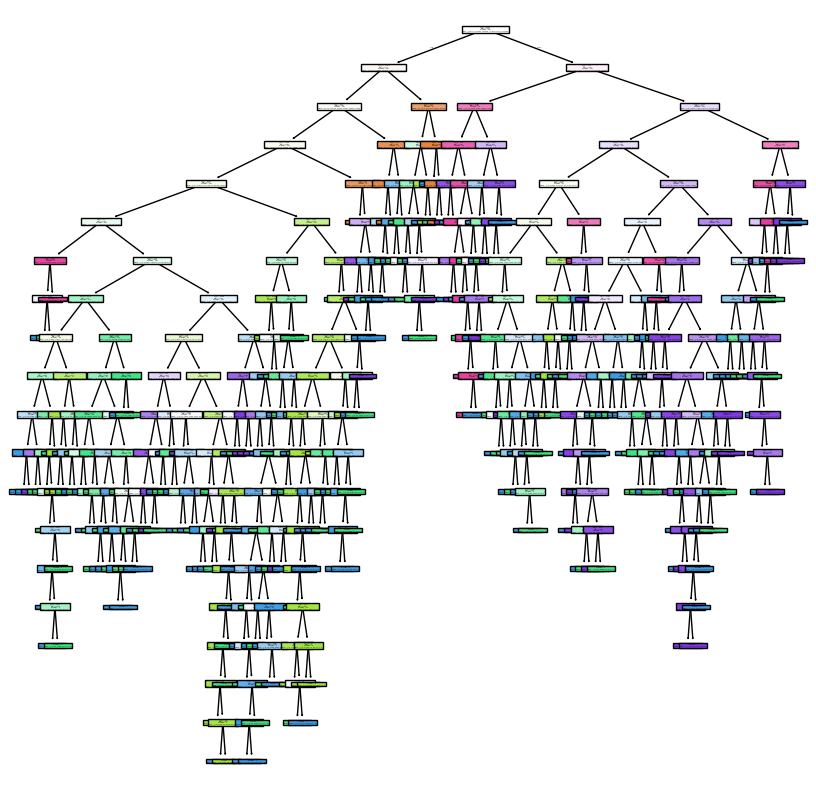

In [ ]:
from sklearn import tree
plt.figure(figsize=(10, 10))
tree.plot_tree(model, filled=True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.6084
Precision: 0.6057
Recall: 0.6084
F1-Score: 0.6055

Classification Report:
              precision    recall  f1-score   support

           4       0.20      0.14      0.17         7
           5       0.68      0.69      0.68       121
           6       0.59      0.55      0.57       121
           7       0.52      0.68      0.59        34
           8       0.00      0.00      0.00         3

    accuracy                           0.61       286
   macro avg       0.40      0.41      0.40       286
weighted avg       0.61      0.61      0.61       286



**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

**TRAINING THE INITAL RANDOM FOREST**

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rf.score(x_test,y_test)

0.6818181818181818

In [ ]:
y_predict_rf=rf.predict(x_test)
print(y_predict_rf)

[5 6 5 5 5 6 5 5 6 5 7 7 6 6 5 5 6 6 5 7 6 6 5 7 5 5 6 6 5 6 5 6 7 6 5 5 6
 6 7 5 6 6 6 5 5 5 5 6 5 6 7 5 6 7 6 6 6 6 6 5 5 6 6 6 6 6 6 5 5 5 6 5 5 6
 5 5 5 6 5 6 6 6 6 5 5 6 5 5 6 6 5 6 5 5 5 5 5 6 6 5 6 6 5 6 5 5 6 6 6 7 7
 5 5 6 5 6 6 6 6 5 5 5 5 6 5 5 6 6 5 6 5 5 7 6 7 5 5 6 5 6 7 5 5 5 6 5 5 5
 5 5 6 5 6 5 6 5 5 5 7 6 5 5 6 6 7 5 6 6 6 5 6 5 6 5 5 5 7 6 6 5 6 5 6 5 5
 5 6 5 6 6 6 6 7 5 6 6 5 6 7 6 5 6 5 6 7 7 5 5 6 6 5 6 5 6 5 6 6 5 7 6 6 6
 5 5 5 6 6 6 6 5 7 7 5 5 6 7 5 6 5 5 6 6 6 5 5 6 5 6 6 5 5 5 6 6 5 6 6 5 5
 5 5 6 7 5 5 5 6 6 5 6 6 7 5 6 5 6 5 6 5 5 5 6 5 5 5 7]


In [ ]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=251020870),
 DecisionTreeClassifier(max_features='sqrt', random_state=1950713471),
 DecisionTreeClassifier(max_features='sqrt', random_state=1532844518),
 DecisionTreeClassifier(max_features='sqrt', random_state=604671352),
 DecisionTreeClassifier(max_features='sqrt', random_state=1584172468),
 DecisionTreeClassifier(max_features='sqrt', random_state=1718943790),
 DecisionTreeClassifier(max_features='sqrt', random_state=781520914),
 DecisionTreeClassifier(max_features='sqrt', random_state=561203764),
 DecisionTreeClassifier(max_features='sqrt', random_state=545464553),
 DecisionTreeClassifier(max_features='sqrt', random_state=1384402789),
 DecisionTreeClassifier(max_features='sqrt', random_state=304205365),
 DecisionTreeClassifier(max_features='sqrt', random_state=1370700318),
 DecisionTreeClassifier(max_features='sqrt', random_state=833593094),
 DecisionTreeClassifier(max_features='sqrt', random_state=1337127570),
 DecisionTree

**RANDOMISED SEARCH**

### Randomized Search Cross-Validation (RandomizedSearchCV) for Random Forest

This code uses a technique called **Randomized Search Cross-Validation** to find the best settings (hyperparameters) for a **Random Forest Classifier** model. Think of it like trying out different combinations of ingredients and oven temperatures when baking a cake to see what makes the best result.

Here's what each part does:

1.  **Importing Libraries:**
    *   `RandomizedSearchCV` from `sklearn.model_selection`: This is the main tool for performing the randomized search.
    *   `randint` from `scipy.stats`: This helps create random ranges for our numerical hyperparameters.
    *   `RandomForestClassifier` from `sklearn.ensemble`: This is the machine learning model we want to optimize.

2.  **Defining the Parameter Distribution (`param_dist`):**
    *   This dictionary specifies the different hyperparameters of the Random Forest model that we want to experiment with, and the range of values each hyperparameter can take.
    *   `'n_estimators'`: The number of individual decision trees in the Random Forest. We're telling it to randomly pick a number between 100 and 500.
    *   `'max_features'`: How many features (columns) each individual tree considers when making a split. Options are `'auto'` (deprecated in newer scikit-learn versions, replaced by `'sqrt'`), `'sqrt'` (square root of total features), or `'log2'` (log base 2 of total features).
    *   `'max_depth'`: The maximum depth (number of levels) of each tree. Randomly chosen between 10 and 100.
    *   `'min_samples_split'`: The minimum number of data points required to split an internal node. Randomly chosen between 2 and 20.
    *   `'min_samples_leaf'`: The minimum number of data points allowed in a leaf node (the end of a branch). Randomly chosen between 1 and 10.
    *   `'bootstrap'`: Whether to use bootstrap samples when building trees (sampling with replacement). It can be `True` or `False`.

3.  **Initializing the Random Forest Model (`rf_model`):**
    *   We create a basic `RandomForestClassifier` instance. `random_state=42` ensures that our results are reproducible if we run the code again.

4.  **Initializing RandomizedSearchCV (`random_search_rf`):**
    *   `estimator=rf_model`: We tell RandomizedSearchCV which model we want to optimize (our Random Forest).
    *   `param_distributions=param_dist`: We give it the ranges and options for the hyperparameters defined earlier.
    *   `n_iter=50`: This is crucial! Instead of trying every single combination (which can be very time-consuming), RandomizedSearchCV will randomly try 50 different combinations of hyperparameters from our `param_dist`. You can increase this number for a more thorough search or decrease it for faster results.
    *   `cv=5`: This sets up 5-fold cross-validation. The training data (`x_train`, `y_train`) is split into 5 parts. The model is trained 5 times, each time using 4 parts for training and 1 part for validation. This helps to get a more robust estimate of the model's performance.
    *   `verbose=2`: This makes the search process print out more information, so you can see its progress.
    *   `random_state=42`: Again, for reproducibility of the random selection of parameter combinations.
    *   `n_jobs=-1`: This tells the process to use all available processor cores, speeding up the search.

5.  **Fitting RandomizedSearchCV (`random_search_rf.fit(x_train, y_train)`):**
    *   This is where the actual search happens. The RandomizedSearchCV will train and evaluate multiple Random Forest models with different hyperparameter combinations on your training data to find the best performing one.

6.  **Printing Results:**
    *   `print("Best parameters found:", random_search_rf.best_params_)`: Shows you the specific combination of hyperparameters that yielded the best performance during the search.
    *   `print("Best accuracy score:", random_search_rf.best_score_)`: Displays the average accuracy score achieved by the best model during the cross-validation process.

7.  **Evaluating the Best Model:**
    *   `best_rf_model = random_search_rf.best_estimator_`: We get the actual Random Forest model that had the best hyperparameters.
    *   `y_pred_best_rf = best_rf_model.predict(x_test)`: We use this best model to make predictions on the unseen test data.
    *   The subsequent `print` statements show the `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, and a detailed `classification_report` for this optimized model on the test data. These metrics tell you how well your model is performing (e.g., how many predictions were correct, how good it is at identifying positive cases, etc.).

**In summary:** This code automates the process of finding good settings for a Random Forest model, which often leads to a more accurate and reliable model than using default settings or trying parameters manually.

In [ ]:
y_binned = y.apply(lambda val: 0 if val <= 5 else 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y_binned, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 500), # Number of trees in the forest
    'max_features': ['sqrt', 'log2'], # Number of features to consider at every split
    'max_depth': randint(10, 100), # Maximum number of levels in tree
    'min_samples_split': randint(2, 20), # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10), # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False] # Method for sampling training data
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42,class_weight='balanced')

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50, # Number of parameter settings that are sampled. Reduce for faster execution.
    cv=5, # Number of folds in cross-validation
    verbose=2, # Controls the verbosity: the higher, the more messages.
    random_state=42,
    n_jobs=-1 # Use all available cores
)

# Fit RandomizedSearchCV to the training data (using X_train and y_train from the previous cell)
random_search_rf.fit(X_train, y_train)

# Print the best parameters and best score found
print("Best parameters found:", random_search_rf.best_params_)
print("Best accuracy score:", random_search_rf.best_score_)

# Get the best model
best_rf_model = random_search_rf.best_estimator_

# Evaluate the best model on the test set (using X_test and y_test from the previous cell)
y_pred_best_rf = best_rf_model.predict(X_test)

accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf, average='weighted', zero_division=0)
recall_best_rf = recall_score(y_test, y_pred_best_rf, average='weighted', zero_division=0)
f1_best_rf = f1_score(y_test, y_pred_best_rf, average='weighted', zero_division=0)

print(f"\nBest Random Forest Model Accuracy: {accuracy_best_rf:.4f}")
print(f"Best Random Forest Model Precision: {precision_best_rf:.4f}")
print(f"Best Random Forest Model Recall: {recall_best_rf:.4f}")
print(f"Best Random Forest Model F1-Score: {f1_best_rf:.4f}")
print("\nClassification Report for Best Random Forest Model:")
print(classification_report(y_test, y_pred_best_rf, zero_division=0))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'bootstrap': False, 'max_depth': 98, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 154}
Best accuracy score: 0.7855341379931543

Best Random Forest Model Accuracy: 0.7642
Best Random Forest Model Precision: 0.7698
Best Random Forest Model Recall: 0.7642
Best Random Forest Model F1-Score: 0.7649

Classification Report for Best Random Forest Model:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       102
           1       0.82      0.74      0.78       127

    accuracy                           0.76       229
   macro avg       0.76      0.77      0.76       229
weighted avg       0.77      0.76      0.76       229



In [ ]:
import joblib

# 1. Best model ko extract karo (agar pehle nahi kiya)
best_rf_model = random_search_rf.best_estimator_

# 2. Model ko file mein save karo
# Isse tumhare folder mein 'wine_quality_rf_76acc.pkl' naam ki file ban jayegi
joblib.dump(best_rf_model, 'wine_quality_rf_76acc.pkl')

print("Model successfully saved as 'wine_quality_rf_76acc.pkl'")

Model successfully saved as 'wine_quality_rf_76acc.pkl'


**FEATURE IMPORTANCE**

/tmp/ipython-input-4118523037.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


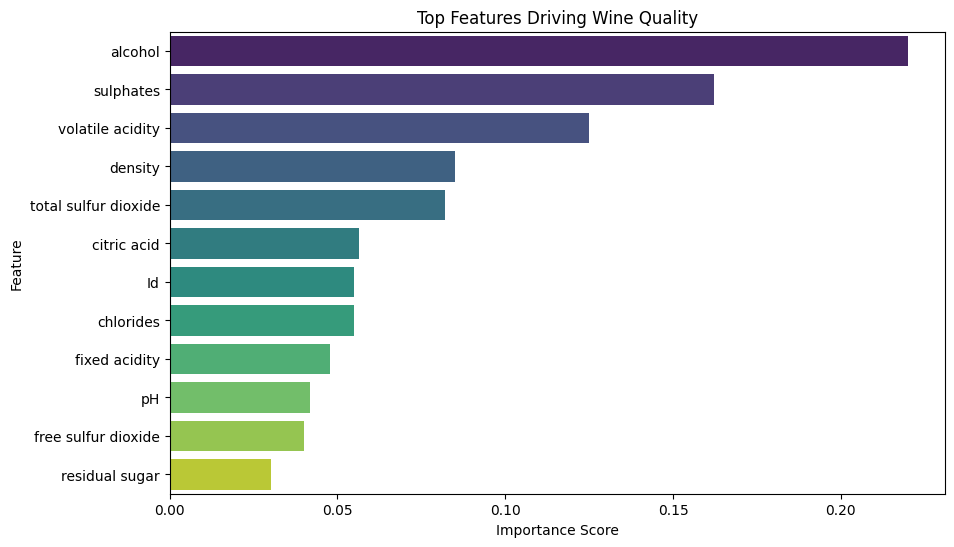

In [ ]:
feature_names = x_train.columns

# Importances nikalna
importances = best_rf_model.feature_importances_

# DataFrame banana taaki sort kar sakein
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# Plot karna
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title("Top Features Driving Wine Quality")
plt.xlabel("Importance Score")
plt.show()